In [1]:
# Importing required libraries
import sqlite3
import random
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity

In [2]:
def shortlist_images(category):
    # DB connection for loading data
    db_connection = sqlite3.connect('../Data Collection/Data/Database/job_database.db')
    query = f"SELECT img_src FROM product_info WHERE type = '{category}'"
    product_df = pd.read_sql_query(query,db_connection)
    return product_df

In [3]:
def similar_images(img_src,compare_image):
    # Dict to store similarity
    image_similarity = {}
    # Iterate through images
    dim = (72,72)
    #compare_image = cv2.cvtColor(compare_image, cv2.COLOR_BGR2RGB)
    #compare_image = cv2.resize(compare_image, dim, interpolation = cv2.INTER_AREA)
    #compare_image = compare_image.reshape(-1)
    for img in img_src['img_src']:
        file_name = img.split('/')[-1]
        path = f'../Data Collection/Data/Images/{file_name}'
        image = cv2.imread(path)
        try:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        except:
            continue
        
        # Resize the image
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        image = image.reshape(-1)
        image_similarity[img] = structural_similarity(compare_image, image)
        
    return image_similarity

### Testing

In [4]:
# Load dataset
image_array = np.loadtxt('../Data Cleaning & Transformation/Data/image_array.csv', delimiter=',')
labels = np.loadtxt('../Data Cleaning & Transformation/Data/image_label_array.csv', delimiter=',', dtype=str)

Selecting a random Hoodie image

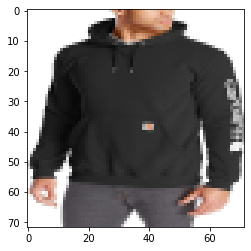

In [5]:
hoodie_labels = (labels == 'Hoodie/Sweatshirt').nonzero()[0]
selected_index = random.randint(0,len(hoodie_labels)-1)

selected_image = image_array[selected_index,:]
plt.imshow(selected_image.reshape((72,72,3)).astype('uint8'))
plt.show()

In [6]:
similarity_score = similar_images(shortlist_images('Hoodie/Sweatshirt'),selected_image)
similarity_df = pd.DataFrame(similarity_score.items(), columns=['img_src','sim_score'])
similarity_df = similarity_df.sort_values(by=['sim_score'], ascending=False)

<ipython-input-3-959c6d5d10c8>:21: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  image_similarity[img] = structural_similarity(compare_image, image)


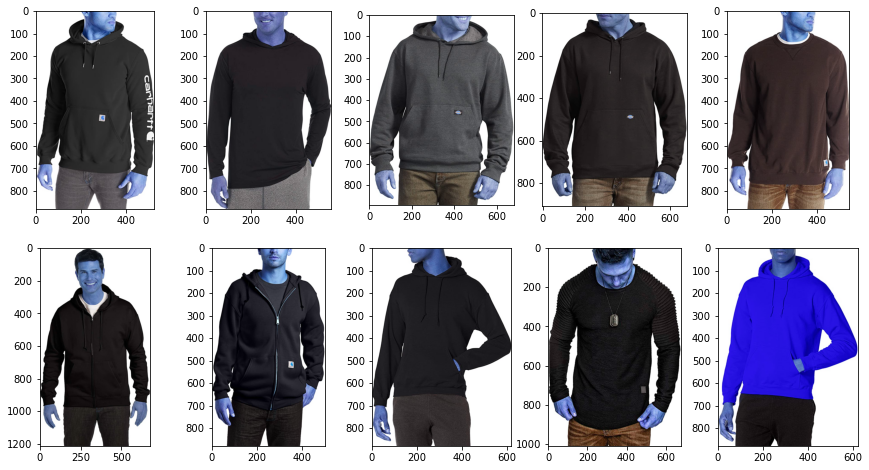

In [7]:
i = 1
plt.figure(figsize=(15,8))
for img_src in similarity_df['img_src'][:10]:
    file_name = img_src.split('/')[-1]
    path = f'../Data Collection/Data/Images/{file_name}'
    image = cv2.imread(path)
    plt.subplot(2,5,i)
    plt.imshow(image)
    i += 1
    
plt.show()